In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


### Loading data from file to dataframe and glancing at it.

In [9]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
boombikes.shape

(730, 16)

In [11]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Categorical Variables
    
    1. season
    2. yr
    3. month
    4. holiday
    5. weekday
    6. workingday
    7. weathersit

#### Numerical Variables

    1. temp
    2. atemp
    3. hum
    4. windspeed

In [12]:
# Checking for missing values
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# Dropping the variables 'instant','dteday','casual','registered' as they are not required for the analysis.
boombikes = boombikes.drop(['instant','dteday','casual','registered'], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Let's first analyze impact of categorical variables on the demand of bikes.

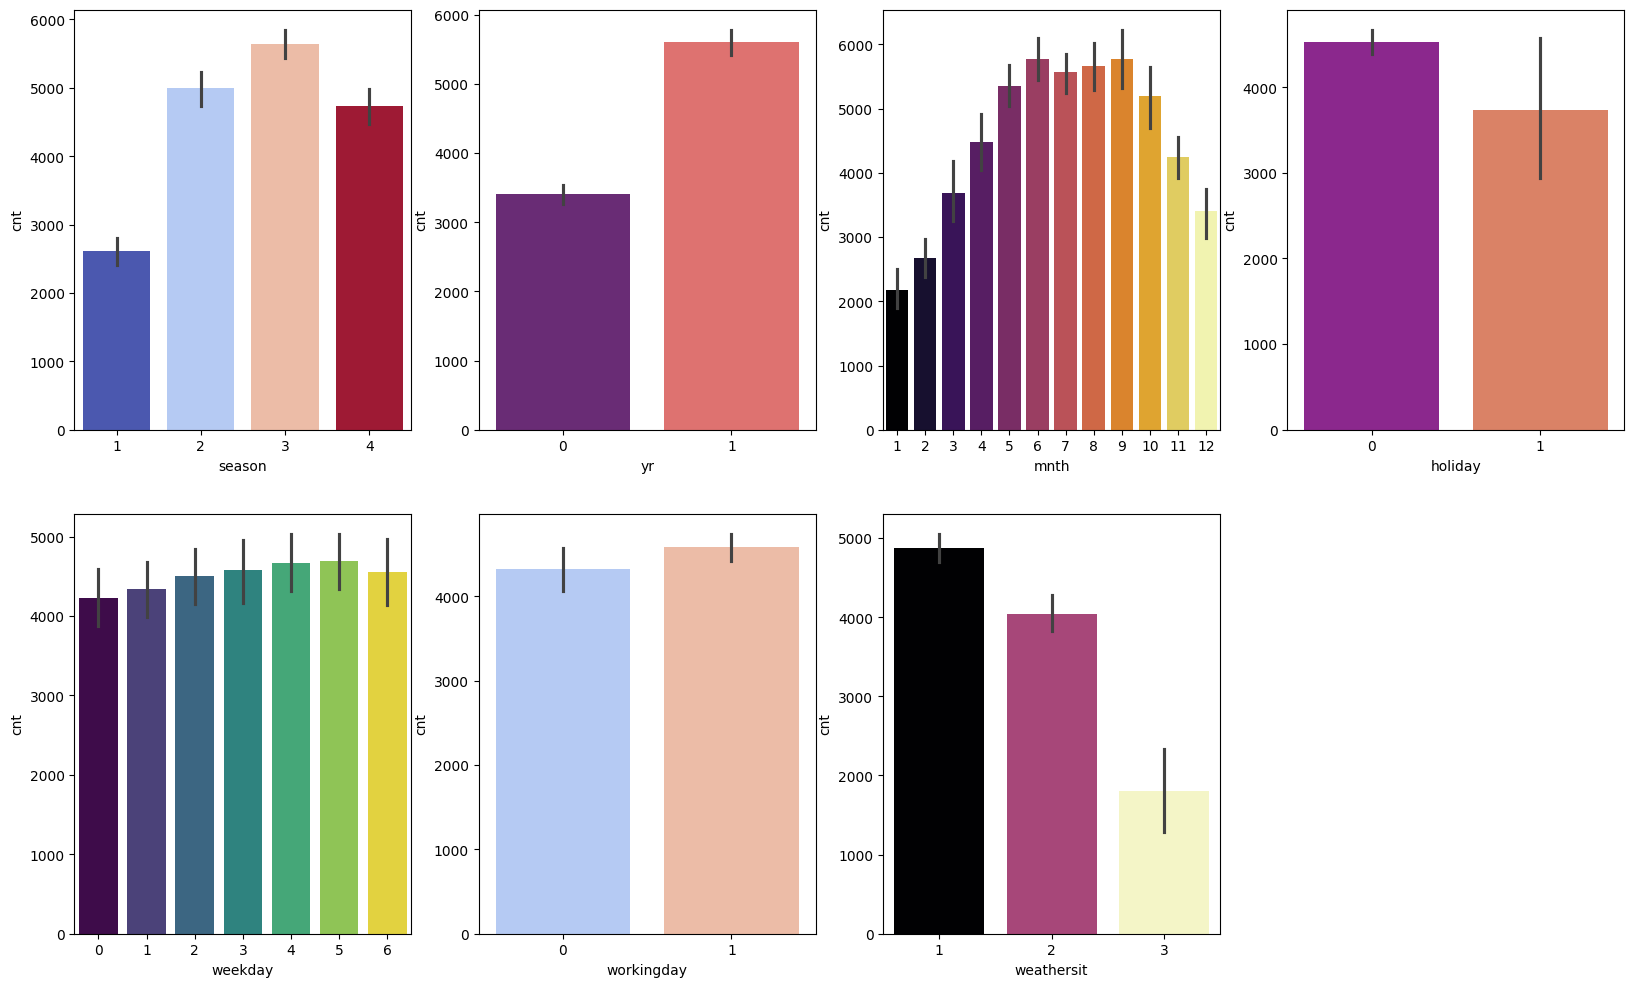

In [38]:
# Ploting the distribution of the target variable 'cnt' against multiple categorical variables 
# to understand the impact of these variables on the demand of bikes.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', data = boombikes, palette = 'coolwarm', hue='season', legend=False)
plt.subplot(2,4,2)
sns.barplot(x = 'yr', y = 'cnt', data = boombikes, palette = 'magma', hue='yr', legend=False)
plt.subplot(2,4,3)
sns.barplot(x = 'mnth', y = 'cnt', data = boombikes, palette = 'inferno', hue='mnth', legend=False)
plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'cnt', data = boombikes, palette = 'plasma', hue='holiday', legend=False)
plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'cnt', data = boombikes, palette = 'viridis', hue='weekday', legend=False)
plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'cnt', data = boombikes, palette = 'coolwarm', hue='workingday', legend=False)
plt.subplot(2,4,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = boombikes, palette = 'magma', hue='weathersit', legend=False)

plt.show()

### Observation:
Following observations can be made from above charts.

1. Summer and fall have the highest demand for bikes. It is also surprising to see more bikes are rented in winter compared to spring.
2. This is mirrored in demand trend of bikes during months from May to December.
2. Year 2019 has more demand for bikes than 2018.
3. Bikes are in less demand during holidays and non-working days. But the difference in demand not significant.
4. Demand for bikes is highest on clear and/or cloudy days and lowest on rainy days.
5. Demand for bikes accross the weeke does not change at a big extent.

## Let's first analyze impact of numerical variables on the target variable.

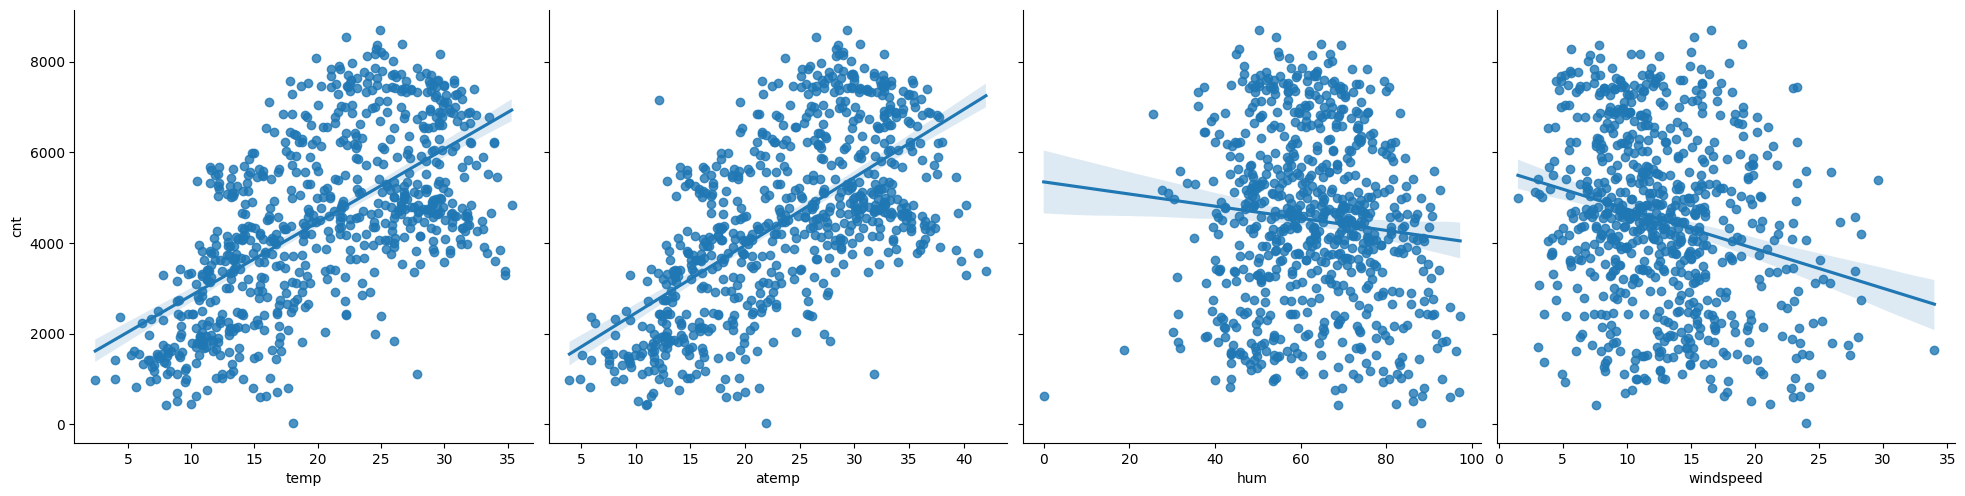

In [44]:
# Ploting the distribution of the target variable 'cnt' against multiple numerical variables 
# to understand the impact of these variables on the demand of bikes.

sns.pairplot(boombikes, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', height=5, aspect=1, kind='reg', palette='viridis')
plt.show()

### Observation:
Following observations can be made from above charts.

1. Demand for bike increases as the temperature increases. People avoid to use bike during colder weather.
2. Demand for bike is more when windspeed is less.

## Let's see the correlation between variables in the dataset.

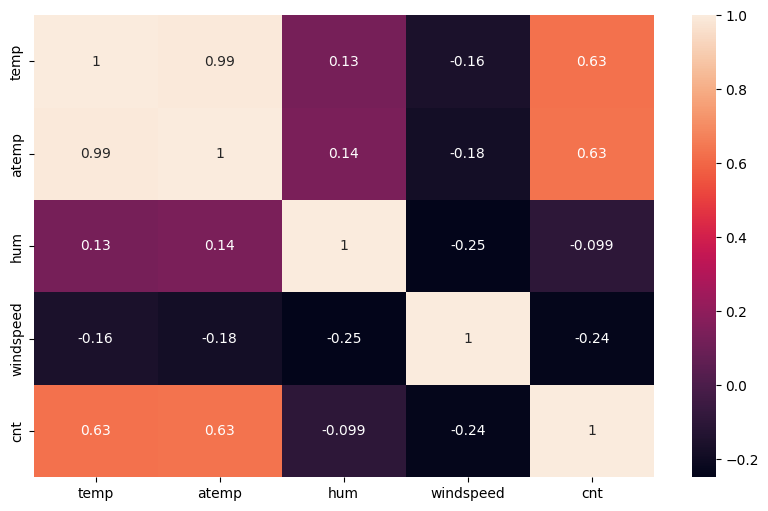

In [47]:
# Plotting a heatman to understand the correlation between the numerical variables.

numric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(10, 6))
sns.heatmap(boombikes[numric_var].corr(), annot=True)
plt.show()

### Observation:
Following observations can be made from above charts.

1. temp and atemp are highly correlated and they have the same correlation with the bikes demand.
2. Windspeed and humidy have negative impact on the demands of bikes.
3. While windspeed is negatively correlated with temp, humidity is positively correlated with temp.
4. Bike demand tend to increase with higher temperature and decrease as windspeed increase as it is observed in earlier plots.